In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../../../../src/")
import nanonets
import scienceplots

from matplotlib.colors import LogNorm
plt.style.use(["science","bright","grid"])

### 8 Electrode Device

In [5]:
N                           = 9
topology_parameter          = {
    "Nx"                :   N,
    "Ny"                :   N,
    "Nz"                :   1,
    "e_pos"             :   [[0,0,0], [int((N-1)/2),0,0], [N-1,0,0], 
                            [0,int((N-1)/2),0], [0,N-1,0], [N-1,int((N)/2),0],
                            [int((N)/2),(N-1),0], [N-1,N-1,0]],
    "electrode_type"    :   ['constant','constant','constant','constant','constant','constant','constant','constant']
}

In [ ]:
sim     = nanonets.simulation(topology_parameter)           # class
e_idx   = np.where(sim.return_net_topology()[:,0]!=-100)[0] # 1D array of node idx connected to sources
C_mat   = sim.return_capacitance_matrix()                   # 2D cap matrix
C_inv   = sim.return_inv_capacitance_matrix()               # Inv cap matrix
C_ie    = sim.mutal_capacitance_adjacent_spheres(
    eps_r=2.6, np_radius1=10., np_radius2=sim.ELECTRODE_RADIUS, np_distance=1.0) # mutual cap between source and node
ele     = sim.ele_charge    # elementary charge
Np      = C_mat.shape[0]

E_sgl   = ele*ele*np.diag(C_inv)/2
U_sgl   = ele*np.diag(C_inv)
s       = int(np.argmin(E_sgl))

U0_th_vals = []
for s in range(Np):
    dV_s = U_sgl[s]

    Ne  = len(e_idx)
    C_e = np.zeros((Np,Ne))
    for i, e_pos in enumerate(e_idx):
        C_e[e_pos,i] = C_ie

    V_per   = np.linalg.solve(C_mat, C_e)
    f       = V_per[s,:]
    U0_th   = dV_s / f
    U0_th_vals.append(U0_th)

df = pd.DataFrame(U0_th_vals)
print(f"E = {np.min(E_sgl)} \nU = {np.min(U_sgl)}")
print(f"s = {s}\ndV = {dV_s}\nf = {f}")
print(f"U_th = {U0_th}")

E = 0.001087648560666054 
U = 0.013577136841081278
s = 80
dV = 0.016000670653082732
f = [1.93595068e-08 4.63070827e-07 2.56509300e-06 4.63070827e-07
 5.96673725e-04 2.56509300e-06 5.96673725e-04 2.23273710e-01]
U_th = [8.26501976e+05 3.45533981e+04 6.23785205e+03 3.45533981e+04
 2.68164492e+01 6.23785205e+03 2.68164492e+01 7.16639261e-02]


Text(42.06756469338072, 0.5, 'NP Index')

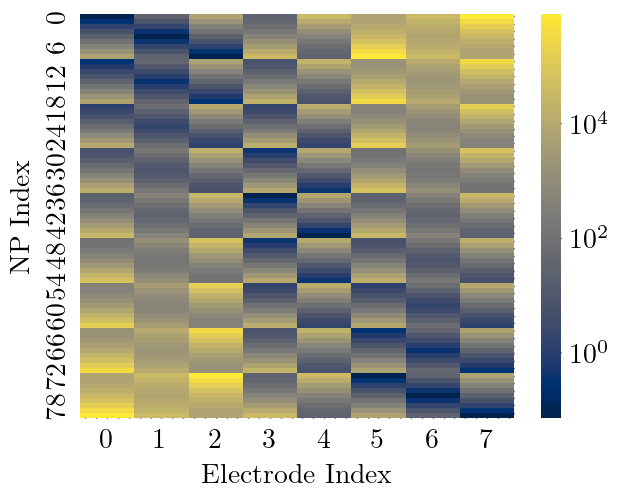

In [45]:
fig, ax = plt.subplots(dpi=200)
ax      = sns.heatmap(data=df, cmap='cividis', ax=ax, norm=LogNorm())
ax.set_xlabel('Electrode Index')
ax.set_ylabel('NP Index')

Text(42.06756469338072, 0.5, 'NP Index')

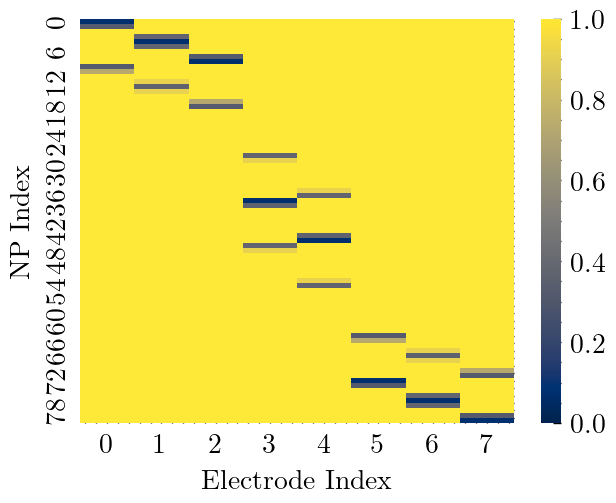

In [43]:
fig, ax = plt.subplots(dpi=200)
ax      = sns.heatmap(data=df, cmap='cividis', ax=ax, vmin=0, vmax=1)
ax.set_xlabel('Electrode Index')
ax.set_ylabel('NP Index')

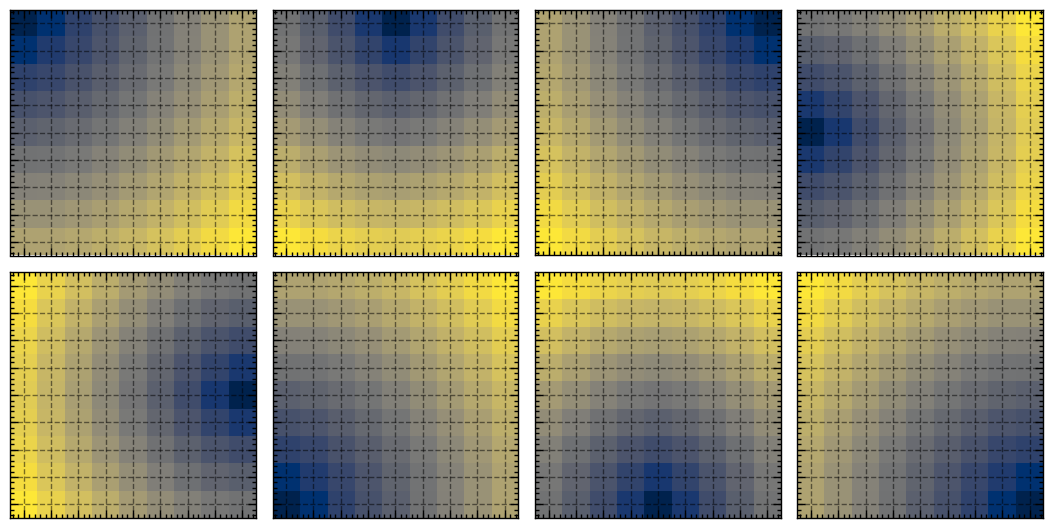

In [ ]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*1.5)
axs = []

for e_idx in range(8):

    arr     = np.array(U0_th_vals)[:,e_idx]
    arr_sq  = arr.reshape(9,-1)

    ax  = fig.add_subplot(2,4,e_idx+1)
    im  = ax.imshow(arr_sq, cmap='cividis', norm=LogNorm())
    _   = ax.set_xticks(np.arange(9))
    _   = ax.set_yticks(np.arange(9))
    ax.set_xticklabels("")
    ax.set_yticklabels("")
    axs.append(ax)

In [72]:
N                           = 9
topology_parameter          = {
    "Nx"                :   N,
    "Ny"                :   N,
    "Nz"                :   1,
    "e_pos"             :   [[int((N-1)/2),0,0]],
    "electrode_type"    :   ['constant']
}

In [73]:
sim     = nanonets.simulation(topology_parameter)           # class
e_idx   = np.where(sim.return_net_topology()[:,0]!=-100)[0] # 1D array of node idx connected to sources
C_mat   = sim.return_capacitance_matrix()                   # 2D cap matrix
C_inv   = sim.return_inv_capacitance_matrix()               # Inv cap matrix
C_ie    = sim.mutal_capacitance_adjacent_spheres(
    eps_r=2.6, np_radius1=10., np_radius2=sim.ELECTRODE_RADIUS, np_distance=1.0) # mutual cap between source and node
ele     = sim.ele_charge    # elementary charge
Np      = C_mat.shape[0]

E_sgl   = ele*ele*np.diag(C_inv)/2
U_sgl   = ele*np.diag(C_inv)
s       = int(np.argmin(E_sgl))

U0_th_vals = []
for s in range(Np):
    dV_s = U_sgl[s]

    Ne  = len(e_idx)
    C_e = np.zeros((Np,Ne))
    for i, e_pos in enumerate(e_idx):
        C_e[e_pos,i] = C_ie

    V_per   = np.linalg.solve(C_mat, C_e)
    f       = V_per[s,:]
    U0_th   = dV_s / f
    U0_th_vals.append(U0_th)

df = pd.DataFrame(U0_th_vals)
print(f"E = {np.min(E_sgl)} \nU = {np.min(U_sgl)}")
print(f"s = {s}\ndV = {dV_s}\nf = {f}")
print(f"U_th = {U0_th}")

E = 0.001087653838536652 
U = 0.013577202724836316
s = 80
dV = 0.020600244787802105
f = [6.31293552e-07]
U_th = [32631.79977537]


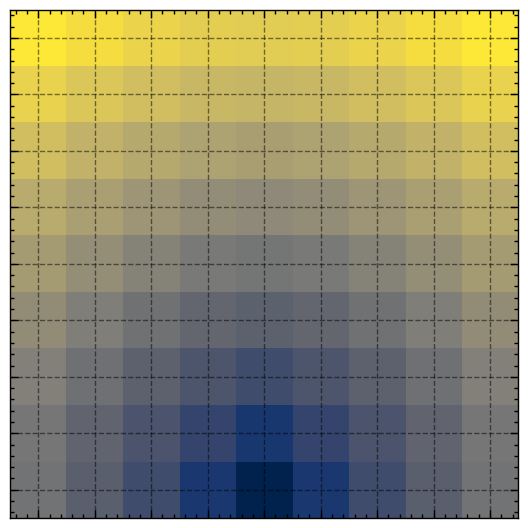

In [77]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*1.5)
axs = []

for e_idx in range(1):

    arr     = np.array(U0_th_vals)[:,e_idx]
    arr_sq  = arr.reshape(9,-1)

    ax  = fig.add_subplot(1,1,e_idx+1)
    im  = ax.imshow(arr_sq, cmap='cividis', norm=LogNorm())
    _   = ax.set_xticks(np.arange(9))
    _   = ax.set_yticks(np.arange(9))
    ax.set_xticklabels("")
    ax.set_yticklabels("")
    ax.invert_yaxis()
    axs.append(ax)

In [79]:
pd.DataFrame(arr_sq)

,0,1,2,3,4,5,6,7,8
0,26.815350,6.702314,1.625164,0.380860,0.071664,0.380860,1.625164,6.702314,26.815350
1,34.250715,9.933988,2.897041,0.914499,0.362753,0.914499,2.897041,9.933988,34.250715
2,67.821411,22.705020,7.864342,3.107245,1.680045,3.107245,7.864342,22.705020,67.821411
3,159.374494,60.718728,24.354315,11.394451,7.401351,11.394451,24.354315,60.718728,159.374494
4,416.831768,177.862376,80.767219,43.016576,31.376513,43.016576,80.767219,177.862376,416.831768
5,1174.457789,552.719738,278.856475,164.295454,129.253182,164.295454,278.856475,552.719738,1174.457789
6,3488.613915,1786.333835,986.139497,629.434332,521.077030,629.434332,986.139497,1786.333835,3488.613915
7,10669.606066,5875.946613,3511.255771,2394.391799,2055.453897,2394.391799,3511.255771,5875.946613,10669.606066
8,32631.799775,18913.566448,12149.425695,8785.758592,7760.112678,8785.758592,12149.425695,18913.566448,32631.799775
